# 1. CARREGANDO ARQUIVOS
Importando bibliotecas 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importando arquivos

In [58]:
df1= pd.read_csv("./listings_cleaned.csv", sep=",", header=0)

In [59]:
df2= pd.read_csv("./reviews.csv", sep=",", header=0)

# 2. EXPLORANDO O DATAFRAME

Verificando as informações para o merge.

In [60]:
df1

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0
...,...,...,...,...,...,...,...,...
39494,1319593870376466401,Copacabana,Entire home/apt,4,2.0,1.0,2.0,957.0
39495,1319611826461021550,Jacarezinho,Entire home/apt,8,1.0,1.0,1.0,288.0
39496,1319620401959854025,Copacabana,Entire home/apt,6,1.0,1.0,4.0,672.0
39497,1319650312466603776,Ipanema,Entire home/apt,6,1.5,2.0,1.0,1083.0


In [61]:
df2

,id,number_of_reviews,review_scores_rating
0,272335,367,4.920000
1,272631,32,5.000000
2,273363,5,5.000000
3,273463,654,4.830000
4,273496,60,4.800000
...,...,...,...
32690,842292,68,4.760000
32691,730997,119,4.760000
32692,857217,0,4.812309
32693,749237,53,4.810000


In [62]:
df1.shape

(39499, 8)

In [63]:
df2.shape

(32695, 3)

In [64]:
df1.isnull().sum()

id                           0
neighbourhood_cleansed       0
room_type                    0
accommodates                 0
bathrooms                 2890
bedrooms                   523
beds                      2869
price                     2855
dtype: int64

In [65]:
df1.drop(['bathrooms', 'bedrooms', 'beds'], axis=1, inplace=True)

In [66]:
df2.isnull().sum()

id                      0
number_of_reviews       0
review_scores_rating    0
dtype: int64

Aparentemente, o segundo dataframe tem menos informações, pois nem todos quartos receberam reviews e possivelmente estes não foram incluídos no segundo data frame com valores de reviews nulos. Então o merge será feito com base nesta informação.

In [67]:
dfmain = pd.merge(df1, df2, how='left', on=['id'])

In [68]:
dfmain.head(8)

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,NaN,NaN
1,272335,Copacabana,Entire home/apt,4,723.0,367.0,4.920000
2,272631,Copacabana,Private room,2,1146.0,32.0,5.000000
3,273261,Leblon,Entire home/apt,6,6742.0,0.0,4.812309
4,273363,Santa Teresa,Private room,1,61.0,5.0,5.000000
5,273463,Lagoa,Entire home/apt,6,1411.0,654.0,4.830000
6,273496,Leblon,Entire home/apt,6,703.0,60.0,4.800000
7,273753,Santa Teresa,Private room,1,59.0,4.0,4.500000


In [69]:
dfmain.shape

(39499, 7)

Observando se os valores nulos de ambas colunas que contém este meliante (valores vazios), possuem a mesma quantidade de linhas.

In [70]:
dfmain.dtypes

id                          int64
neighbourhood_cleansed     object
room_type                  object
accommodates                int64
price                     float64
number_of_reviews         float64
review_scores_rating      float64
dtype: object

Observando os tipos das variáveis, mudando a ID para String para evitar que operações aritméticas sejam feitas com essa coluna.

In [71]:
dfmain['id'] = dfmain['id'].astype(str)

In [72]:
dfmain[dfmain['number_of_reviews'].isnull()]

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,NaN,NaN
14,48901,Copacabana,Entire home/apt,11,NaN,NaN,NaN
18,278745,Ipanema,Entire home/apt,5,5394.0,NaN,NaN
19,280625,Botafogo,Private room,3,377.0,NaN,NaN
23,282071,Flamengo,Entire home/apt,2,438.0,NaN,NaN
...,...,...,...,...,...,...,...
39464,1319098256127948541,Copacabana,Entire home/apt,7,3214.0,NaN,NaN
39477,1319505930858342161,Glória,Entire home/apt,4,1057.0,NaN,NaN
39480,1319513224061078191,Joá,Entire home/apt,12,14950.0,NaN,NaN
39482,1319533235891441001,Copacabana,Private room,2,609.0,NaN,NaN


In [73]:
dfmain[dfmain['review_scores_rating'].isnull()]

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,NaN,NaN
14,48901,Copacabana,Entire home/apt,11,NaN,NaN,NaN
18,278745,Ipanema,Entire home/apt,5,5394.0,NaN,NaN
19,280625,Botafogo,Private room,3,377.0,NaN,NaN
23,282071,Flamengo,Entire home/apt,2,438.0,NaN,NaN
...,...,...,...,...,...,...,...
39464,1319098256127948541,Copacabana,Entire home/apt,7,3214.0,NaN,NaN
39477,1319505930858342161,Glória,Entire home/apt,4,1057.0,NaN,NaN
39480,1319513224061078191,Joá,Entire home/apt,12,14950.0,NaN,NaN
39482,1319533235891441001,Copacabana,Private room,2,609.0,NaN,NaN


Aqui comecei o data cleaning. O meu problema inicial aqui foi que, se eu apagar as linhas que tenham colunas vazias, não conseguiria fazer uma analise como "Média do preço de um imóvel em Copacabana" sem risco de viés na minha análise, já que quase 7 mil linhas é um valor razoável de influência. Poderia fazer uma média para preencher os valores nulos, mas minha abordagem daqui pra frente dependeria das perguntas de negócio e de que colunas teria que usar em análises para respondê-las. Em uma situação hipotética, onde eu não teria quais perguntas o cliente quer realizar, farei ambos os métodos, armazenando em variáveis diferentes para trabalhar com o que mais seja conveniente no futuro diante das propostas que podem surgir. Pode ser que acabe por ignorar um dos caminhos, mas ter os dois disponíveis me deixa mais confortável.

# Caminho eliminando os nulos:

In [74]:
dfmain_sem_nulos = dfmain.dropna(subset=['number_of_reviews', 'review_scores_rating'])

Interessante aqui é que, ao remover os valores nulos das colunas de rating e reviews, a coluna preço se acertou também. Mas, nem tudo é pêra com chocolate, dos 39499 valores originais, restou 32695 que dá cerca de uns 17% de perca, o que dá uma possibilidade razoável de surgir analises inviezadas.

In [75]:
dfmain_sem_nulos.isnull().sum()

id                        0
neighbourhood_cleansed    0
room_type                 0
accommodates              0
price                     0
number_of_reviews         0
review_scores_rating      0
dtype: int64

In [76]:
dfmain_sem_nulos.shape

(32695, 7)

# Caminho dois: Preenchendo com a média os valores faltantes de três colunas. Price, number_of_reviews e review_scores_rating.

In [77]:
dfmain['number_of_reviews'] = dfmain['number_of_reviews'].fillna(dfmain['number_of_reviews'].mean())

In [78]:
dfmain['price'] = dfmain['price'].fillna(dfmain['price'].mean())

In [79]:
dfmain['review_scores_rating'] = dfmain['review_scores_rating'].fillna(dfmain['review_scores_rating'].mean())

In [80]:
dfmain.isnull().sum()


id                        0
neighbourhood_cleansed    0
room_type                 0
accommodates              0
price                     0
number_of_reviews         0
review_scores_rating      0
dtype: int64

In [81]:
dfmain.head(8)

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,24.1321,4.816146
1,272335,Copacabana,Entire home/apt,4,723.0,367.0000,4.920000
2,272631,Copacabana,Private room,2,1146.0,32.0000,5.000000
3,273261,Leblon,Entire home/apt,6,6742.0,0.0000,4.812309
4,273363,Santa Teresa,Private room,1,61.0,5.0000,5.000000
5,273463,Lagoa,Entire home/apt,6,1411.0,654.0000,4.830000
6,273496,Leblon,Entire home/apt,6,703.0,60.0000,4.800000
7,273753,Santa Teresa,Private room,1,59.0,4.0000,4.500000


Comparando para se ter uma ideia da quantidade de dados de ambos

In [82]:
dfmain.shape

(39499, 7)

In [83]:
dfmain_sem_nulos.shape

(32695, 7)

Percebi que, em ocorrências onde não se obteve nenhuma avaliação dos clientes, o review_scores_rating assumiu um valor mediano. Não acho isso o certo, então irei zerar o valor desta coluna quando o número de avaliação estiver zerado também.

In [84]:
#Eliminando médias calculadas em colunas de media de rating onde o numero de reviews foi 0
dfmain.loc[dfmain['number_of_reviews'] == 0, 'review_scores_rating'] = 0

# Iniciando trabalho com Outliers

Visualizando os meliantes:

<Axes: >

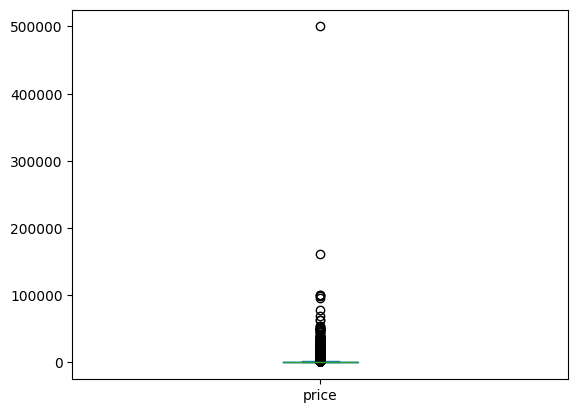

In [85]:
dfmain['price'].plot(kind="box")

Não vi valores negativos, mas pela prática...

In [86]:
dfpositivos = dfmain[dfmain['price'] > 0]

Retirando os quadrantes e limites:

In [87]:
Q1 = dfpositivos['price'].quantile(0.25)

In [88]:
Q3 = dfpositivos['price'].quantile(0.75)

In [89]:
IQR = Q3 - Q1

In [90]:
lsuperior = Q3 + 1.5 * IQR
linferior = Q1 - 1.5 * IQR


Visualizando os valores, por que sim e por que eu gosto:

In [91]:
print(f"Q3: {Q3:.2f}\nQ1: {Q1:.2f}\nIQR: {IQR:.2f}\nLimite Superior: {lsuperior:.2f}\nLimite Inferior: {linferior:.2f}")

Q3: 1227.12
Q1: 429.00
IQR: 798.12
Limite Superior: 2424.30
Limite Inferior: -768.18


In [92]:
#Identificando os Outliers
#priceout = Outliers da coluna price
priceout = dfpositivos[(dfpositivos['price'] < linferior) | (dfpositivos['price'] > lsuperior)]

Observando os valores

In [93]:
priceout.head(8)

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
3,273261,Leblon,Entire home/apt,6,6742.0,0.0000,0.000000
13,48305,Ipanema,Entire home/apt,13,3532.0,180.0000,4.760000
16,50759,Barra da Tijuca,Entire home/apt,14,6000.0,7.0000,4.570000
18,278745,Ipanema,Entire home/apt,5,5394.0,24.1321,4.816146
25,284910,Copacabana,Entire home/apt,4,5054.0,43.0000,4.450000
28,53533,Joá,Entire home/apt,10,2697.0,37.0000,4.950000
36,76245,Copacabana,Entire home/apt,12,4567.0,160.0000,4.390000
69,298395,Copacabana,Entire home/apt,8,3029.0,53.0000,4.920000


Observando a quantidade de valores que serão removidos

In [94]:
priceout.shape

(2994, 7)

In [95]:
#pricetrue = variavel slice do dfmain, porém sem outliers
pricetrue = dfpositivos[(dfpositivos['price'] > linferior) & (dfpositivos['price'] < lsuperior)]

In [96]:
pricetrue.head(8)

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,24.1321,4.816146
1,272335,Copacabana,Entire home/apt,4,723.0,367.0000,4.920000
2,272631,Copacabana,Private room,2,1146.0,32.0000,5.000000
4,273363,Santa Teresa,Private room,1,61.0,5.0000,5.000000
5,273463,Lagoa,Entire home/apt,6,1411.0,654.0000,4.830000
6,273496,Leblon,Entire home/apt,6,703.0,60.0000,4.800000
7,273753,Santa Teresa,Private room,1,59.0,4.0000,4.500000
8,274116,Santa Teresa,Entire home/apt,3,225.0,48.0000,4.920000


In [97]:
pricetrue.shape

(36505, 7)

In [98]:
pricetrue.head(8)

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,24.1321,4.816146
1,272335,Copacabana,Entire home/apt,4,723.0,367.0000,4.920000
2,272631,Copacabana,Private room,2,1146.0,32.0000,5.000000
4,273363,Santa Teresa,Private room,1,61.0,5.0000,5.000000
5,273463,Lagoa,Entire home/apt,6,1411.0,654.0000,4.830000
6,273496,Leblon,Entire home/apt,6,703.0,60.0000,4.800000
7,273753,Santa Teresa,Private room,1,59.0,4.0000,4.500000
8,274116,Santa Teresa,Entire home/apt,3,225.0,48.0000,4.920000


<Axes: >

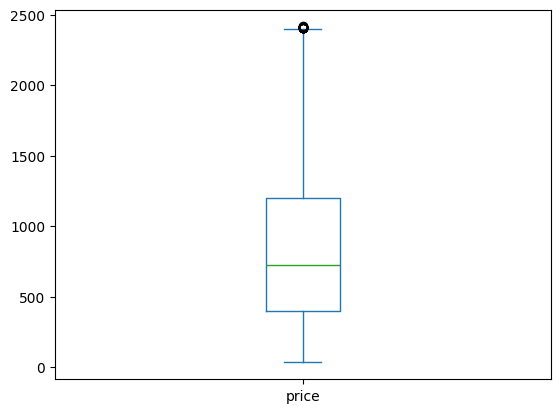

In [99]:
#visualizando os dados sem outliers no boxplot
pricetrue['price'].plot(kind="box")

# Preparando dados para Machine Learning, com conversões de dados categóricos em dados numéricos.

Observação: Na descrição da atividade, houve um erro na etapa 04, onde o enunciado da proposta é apenas uma parte da dica da etapa 01. Informei na plataforma e estou deduzindo que querem que seja feito a conversão de dados categoricos para numéricos, e é o que farei, mas qualquer coisa me perdoem os erros.



Algumas operações abaixo me deram problemas pois só permitem ser realizadas se meu slice se tornar um dataframe. Realizarei uma copia do meu dataframe sem outliers para poder injetar os comandos diretamente.

In [100]:
pricetrue = dfmain[
    (dfmain['price'] >= linferior) & 
    (dfmain['price'] <= lsuperior)
].copy()

Observando pra ver se a quantidade de dados está correta com o dataframe sem outliers

In [101]:
pricetrue.shape

(36505, 7)

In [102]:
pricetrue.dtypes

id                         object
neighbourhood_cleansed     object
room_type                  object
accommodates                int64
price                     float64
number_of_reviews         float64
review_scores_rating      float64
dtype: object

In [103]:
pricetrue.head()

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,24.1321,4.816146
1,272335,Copacabana,Entire home/apt,4,723.0,367.0000,4.920000
2,272631,Copacabana,Private room,2,1146.0,32.0000,5.000000
4,273363,Santa Teresa,Private room,1,61.0,5.0000,5.000000
5,273463,Lagoa,Entire home/apt,6,1411.0,654.0000,4.830000


Convertendo a variavel para categoricas e criando ao mesmo tempo as novas colunas com os valores numéricos

In [104]:
pricetrue['room_type_code'] = pricetrue['room_type'].astype('category').cat.codes

In [105]:
pricetrue.head(8)

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating,room_type_code
0,271975,Vidigal,Entire home/apt,4,236.0,24.1321,4.816146,0
1,272335,Copacabana,Entire home/apt,4,723.0,367.0000,4.920000,0
2,272631,Copacabana,Private room,2,1146.0,32.0000,5.000000,2
4,273363,Santa Teresa,Private room,1,61.0,5.0000,5.000000,2
5,273463,Lagoa,Entire home/apt,6,1411.0,654.0000,4.830000,0
6,273496,Leblon,Entire home/apt,6,703.0,60.0000,4.800000,0
7,273753,Santa Teresa,Private room,1,59.0,4.0000,4.500000,2
8,274116,Santa Teresa,Entire home/apt,3,225.0,48.0000,4.920000,0


Eliminando a coluna original

In [ ]:

pricetrue = pricetrue.drop('room_type', axis=1)

In [107]:
pricetrue.head()

,id,neighbourhood_cleansed,accommodates,price,number_of_reviews,review_scores_rating,room_type_code
0,271975,Vidigal,4,236.0,24.1321,4.816146,0
1,272335,Copacabana,4,723.0,367.0000,4.920000,0
2,272631,Copacabana,2,1146.0,32.0000,5.000000,2
4,273363,Santa Teresa,1,61.0,5.0000,5.000000,2
5,273463,Lagoa,6,1411.0,654.0000,4.830000,0


Mesmo procedimento para a coluna neighbourhood_cleansed

In [108]:
pricetrue['neighbhood_clean_code'] = pricetrue['neighbourhood_cleansed'].astype('category').cat.codes

In [109]:
pricetrue = pricetrue.drop('neighbourhood_cleansed', axis=1)

#ETAPA 05 - VERIFICANDO DADOS

In [110]:
pricetrue.head()

,id,accommodates,price,number_of_reviews,review_scores_rating,room_type_code,neighbhood_clean_code
0,271975,4,236.0,24.1321,4.816146,0,144
1,272335,4,723.0,367.0000,4.920000,0,32
2,272631,2,1146.0,32.0000,5.000000,2,32
4,273363,1,61.0,5.0000,5.000000,2,121
5,273463,6,1411.0,654.0000,4.830000,0,75


In [111]:
pricetrue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36505 entries, 0 to 39498
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     36505 non-null  object 
 1   accommodates           36505 non-null  int64  
 2   price                  36505 non-null  float64
 3   number_of_reviews      36505 non-null  float64
 4   review_scores_rating   36505 non-null  float64
 5   room_type_code         36505 non-null  int8   
 6   neighbhood_clean_code  36505 non-null  int16  
dtypes: float64(3), int16(1), int64(1), int8(1), object(1)
memory usage: 1.8+ MB


In [112]:
pricetrue.describe()

,accommodates,price,number_of_reviews,review_scores_rating,room_type_code,neighbhood_clean_code
count,36505.000000,36505.000000,36505.000000,36505.000000,36505.000000,36505.000000
mean,3.746692,815.409245,24.064355,3.766056,0.426544,51.855527
std,1.962116,506.732227,43.719568,2.009395,0.831742,36.855453
min,1.000000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,400.000000,1.000000,4.290000,0.000000,32.000000
50%,4.000000,723.000000,9.000000,4.816146,0.000000,32.000000
75%,4.000000,1200.000000,24.132100,5.000000,0.000000,74.000000
max,16.000000,2418.000000,710.000000,5.000000,3.000000,152.000000
